# Using Age, Cholesterol, and Resting Blood Pressure To Predict the Likelyhood of Heart Disease

### Adwait Kulkarni, Jessica Chen, Kevin Kercher

# Introduction

Heart disease is considered a significant cause of mortality around the world. Due to difficulties in providing accurate diagnoses, experts have turned to machine learning techniques in order to provide more accurate results to reduce the chances of misdiagnoses and fatality caused by cardiovascular diseases. 

Specifically, factors like cholesterol, age and blood pressure have been found to affect the risk of heart disease. High levels of cholesterol allow for fatty deposits in blood vessels to grow, making it difficult for blood to flow through arteries. (Mayo Clinic, 2023). Aging may cause changes in an individual's heart and veins which may lead to higher risks of heart disease (NIH National Institute on Aging, 2018). High blood pressure may damage an individual's arteries, decreasing the flow of blood to the heart and increasing the risk of heart disease. (CDC, 2021).

We will be exploring [the heart disease Cleveland database](https://archive.ics.uci.edu/dataset/45/heart+disease). The cleveland database includes 302 rows and 14 variables.

It is a multivariate dataset with categorical, integer and real variables. There are also variables with missing values (ca and thal)

We will be using the predictors age (Age), chol (Cholestrol), and trestbps (Resting blood pressure) to predict whether or not an individual will be diagnosed with heart disease. 

Question: **How does a patient's age, cholesterol levels and resting blood pressure levels tell us about the liklelyhood of the patient being diagnosed with heart disease?**

# Preliminary Exploratory Data Analysis

In [118]:
import pandas as pd
import altair as alt

In [119]:
data = pd.read_csv("data/processed_cleveland.csv")
data.columns = ["Age_Of_Patient", "Sex_Of_Patient", "Chest_Pain_Type", "Resting_Blood_Pressure", "Serum_Cholestrol", 
                "Fasting_Blood_Sugar", "Resting_Electrocardiographic_Results", "Maximum_Heart_Rate", "Exercise_Induced_Angina",
                "ST_Depression_Induced_By_Exercise_Relative_To_Rest", "Peak_Exercise_ST_Segment_Slope", "Number_Of_Colored_Major_Vessels",
                "Thal", "num"]

In [120]:
data.head(25)

,Age_Of_Patient,Sex_Of_Patient,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results,Maximum_Heart_Rate,Exercise_Induced_Angina,ST_Depression_Induced_By_Exercise_Relative_To_Rest,Peak_Exercise_ST_Segment_Slope,Number_Of_Colored_Major_Vessels,Thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
5,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
6,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
7,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
8,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
9,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0


In [121]:
data = data[["Age_Of_Patient", "Serum_Cholestrol", "Resting_Blood_Pressure", "num"]]
data = data.assign(Diagnosis_Of_Heart_Disease = data[["num"]])
data["Diagnosis_Of_Heart_Disease"] = data["Diagnosis_Of_Heart_Disease"].replace({0.0 : False, 1.0: True, 2: True, 3: True, 4: True})
data.head(50)

,Age_Of_Patient,Serum_Cholestrol,Resting_Blood_Pressure,num,Diagnosis_Of_Heart_Disease
0,67.0,286.0,160.0,2,True
1,67.0,229.0,120.0,1,True
2,37.0,250.0,130.0,0,False
3,41.0,204.0,130.0,0,False
4,56.0,236.0,120.0,0,False
5,62.0,268.0,140.0,3,True
6,57.0,354.0,120.0,0,False
7,63.0,254.0,130.0,2,True
8,53.0,203.0,140.0,1,True
9,57.0,192.0,140.0,0,False


In [123]:
age_vs_chol_plot = alt.Chart(data).mark_point().encode(
    x=alt.X("Age_Of_Patient").title("Age of patient").scale(zero=False),
    y=alt.Y("Serum_Cholestrol").title("Cholestrol of patient").scale(zero=False),
    color=alt.Color("Diagnosis_Of_Heart_Disease")
)
age_vs_rbp_plot = alt.Chart(data).mark_point().encode(
    x=alt.X("Age_Of_Patient").title("Age of patient").scale(zero=False),
    y=alt.Y("Resting_Blood_Pressure").title("Resting Blood Pressure").scale(zero=False),
    color=alt.Color("Diagnosis_Of_Heart_Disease")
)
rbp_vs_chol_plot = alt.Chart(data).mark_point().encode(
    x=alt.X("Resting_Blood_Pressure").title("Resting Blood Pressure").scale(zero=False),
    y=alt.Y("Serum_Cholestrol").title("Cholestrol of patient").scale(zero=False),
    color=alt.Color("Diagnosis_Of_Heart_Disease")
)
age_vs_chol_plot|age_vs_rbp_plot|rbp_vs_chol_plot

alt.HConcatChart(...)

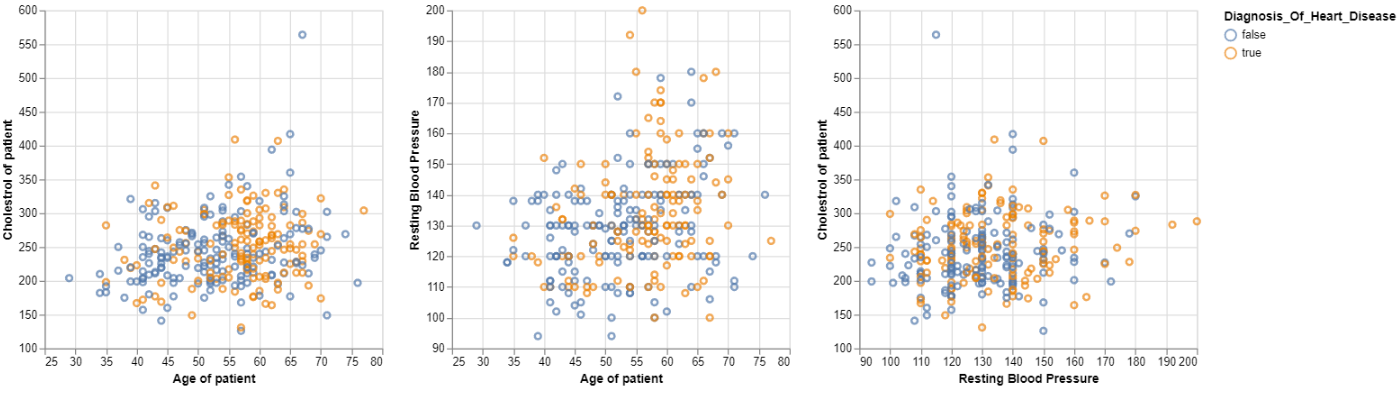

# Methods 

We renamed the columns from the original dataset to have better, more descriptive names. For our analysis, we will be using the columns: Age_Of_Patient, Serum_Cholestrol(Mg/dl), and Resting_Blood_Pressure to classify whether an individual will be predicted to have heart disease or not.

The columns are as follows:  
    - **Age** (Years)  
    - **Sex** (1=male, 0=female)  
    - **CP**: Chest pain type (Value 1: typical angina,  Value 2: atypical angin, - Value 3: non-anginal pa, -- Value 4: asymptoma)  
    - **trestbps**: Resting blood pressure (mm HG)  
    - **chol**: Serum cholestoral (mg/dl)  
    - **fbs**: Fasting blood sugar>120mg/dl (1=true,0=false)  
    - **restecg**: resting electrocardiographic results (0=normal, 1= has ST-T wave abnormality)  
    - **thalach**: max heart rate achieved  
    - **exang**: Exercise induced agina (1=yes, 0=no)  
    - **oldpeak**: ST deression induced by exercise relative to rest  
    - **slope**: Slope of the peak exercise ST segment (1=upsloping, 2=flat, 3=downsloping)  
    - **ca**: Number of major vessels(0-3)  
    - **thal**: 3=normal, 6=fixed defect, 7=reversable defect  
    - **num**: Diagnosis of heart disease (0=absence, 1,2,3,4= present)  

There are a total of 303 rows and 14 columns. The predictor variables that we are using don't have any missing (N/A) values and the provided data is already in tidy format.  

The **Diagnosis of Heart Disease** variable (**num** in the original variable names) contained numeric values from 0 to 4. We changed this to contain the boolean variables True and False with a True value corresponding to a patient having a chance of getting heart disease (1, 2, 3, 4) and a False value corresponding to a patient having no chance of having heart disease.

# Expected outcomes and significance

We expect to find a trend and relationship between a patient's age, cholesterol levels and resting blood pressure and whether they will get diagnosed with heart disease (i.e. patient with higher cholesterol, higher resting blood pressure and older age is predicted to have heart disease).

With these findings, we can make diagnosing heart disease more efficient and accurate, reducing the chances of misdiagnoses and reduce the fatality rates of heart disease.

With our findings, other researchers may be able to further research the causation between the relationships found in our analysis. Since we know correlation does not equal causation, others may be able to research what specificallt causes these trends. 